## Testing some of the main OpenCV functions

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

dataset_path = '../dataset/'
test_pictures_path = dataset_path + 'tif_merged_processed/'

In [2]:
picture = '1w_D Merged_Processed.tif'
picture_path = test_pictures_path + picture

______________________________

In [3]:
img = cv2.imread(picture_path, cv2.IMREAD_GRAYSCALE)
assert img is not None, 'No image found.'   # asert check if true, otherwise raise an AssertionError with an optional error message

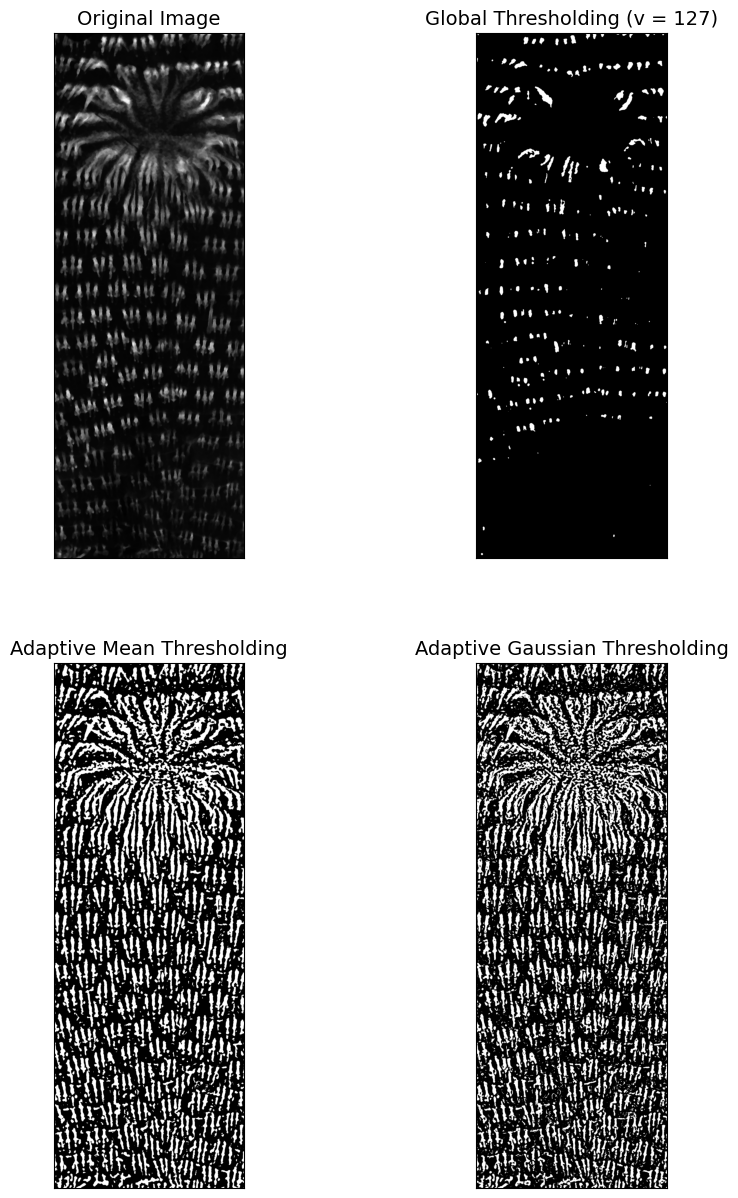

In [57]:
img = cv2.medianBlur(img, 5)

value = 30
bs = 41 # Blocksize
C = 0

ret, th1 = cv2.threshold(img, 127, value, cv2.THRESH_BINARY)

th2 = cv2.adaptiveThreshold(img, value, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, bs, C)

th3 = cv2.adaptiveThreshold(img, value, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, bs, C)
# ADAPTIVE_THRESH_GAUSSIAN_C: threshold value is the weighted sum (cross-correlation with a Gaussian window) of the BlocksizexBlocksize neighborhood of a pixel minus C

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]


plt.figure(figsize=(10, 15))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i], fontsize=14)
    plt.xticks([]), plt.yticks([])
plt.show()

### Adaptive threshold - MEAN

In [ ]:
value_range = range(0, 256, 51) 
bs_range = range(71, 501, 78) 
C_const = 4

fig, axs = plt.subplots(len(value_range), len(bs_range), figsize=(18, 45))

for i, value in enumerate(value_range):
    for j, l in enumerate(bs_range):
        th2 = cv2.adaptiveThreshold(img, value, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, l, C_const)
        axs[i, j].imshow(th2, 'gray')
        axs[i, j].set_title(f'value={value}, l={l}', fontsize=12)
        axs[i, j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
value_range = range(0, 256, 51) 
bs_range = range(71, 501, 78) 
C_const = 4

fig, axs = plt.subplots(len(value_range), len(bs_range), figsize=(18, 45))

for i, value in enumerate(value_range):
    for j, l in enumerate(bs_range):
        th3 = cv2.adaptiveThreshold(img, value, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, l, C_const)
        axs[i, j].imshow(th3, 'gray')
        axs[i, j].set_title(f'value={value}, l={l}', fontsize=12)
        axs[i, j].axis('off')

plt.tight_layout()
plt.show()

___________________________________

## Otsu's Binarization

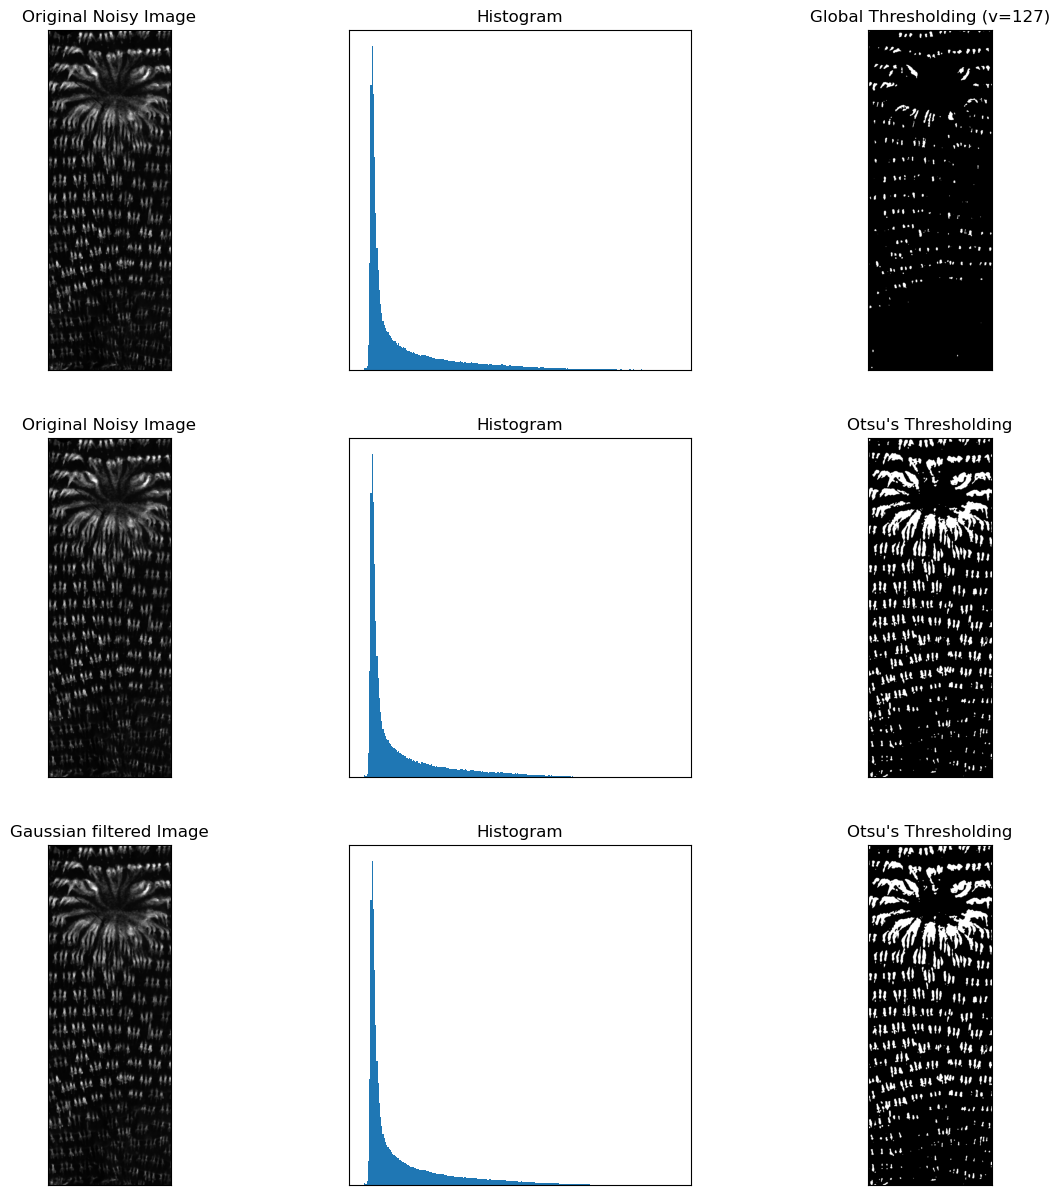

In [59]:
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

plt.figure(figsize=(15, 15))

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])